***

# Análise de incêndios no Brasil de 2008 a 2017

***

![fires](https://media1.tenor.com/images/9d82f04f3b28893bb2a51eb32c28d96f/tenor.gif?itemid=9016777)

***
Artigo referência: Nonpooling Convolutional Neural Network Forecasting for Seasonal Time Series with Trends

In [1]:
from IPython.display import IFrame
IFrame("Nonpooling Convolutional Neural Network Forecasting for Seasonal Time Series with Trends.pdf", width=800, height=300)

***
# Sumário

1. Entendimento  do  Negócio
2. Entendimento  dos  Dados
3. Preparação  dos  Dados
4. Modelagem
5. Avaliação
***

In [2]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
forest = pd.read_csv("amazon.csv", sep=',', encoding='latin-1')

In [4]:
forest.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
forest=forest.drop('date', axis=1)

In [6]:
forest["month"] = forest["month"].map({"Janeiro": "1",
                         "Fevereiro": "2",
                         "Março": "3",
                         "Abril": "4",
                         "Maio": "5",
                         "Junho": "6",
                         "Julho": "7",
                         "Agosto": "8",
                         "Setembro": "9",
                         "Outubro": "10",
                         "Novembro": "11",
                         "Dezembro": "12",}).astype(int)

In [7]:
forest.dtypes

year        int64
state      object
month       int64
number    float64
dtype: object

In [8]:
data = []
for y, m in zip(forest.year, forest.month):
    data.append(date(y, m, 1))


forest['data'] = data

In [9]:
forest.head()

,year,state,month,number,data
0,1998,Acre,1,0.0,1998-01-01
1,1999,Acre,1,0.0,1999-01-01
2,2000,Acre,1,0.0,2000-01-01
3,2001,Acre,1,0.0,2001-01-01
4,2002,Acre,1,0.0,2002-01-01


In [10]:
aux = forest.groupby(['year'])['number'].agg('sum').reset_index()

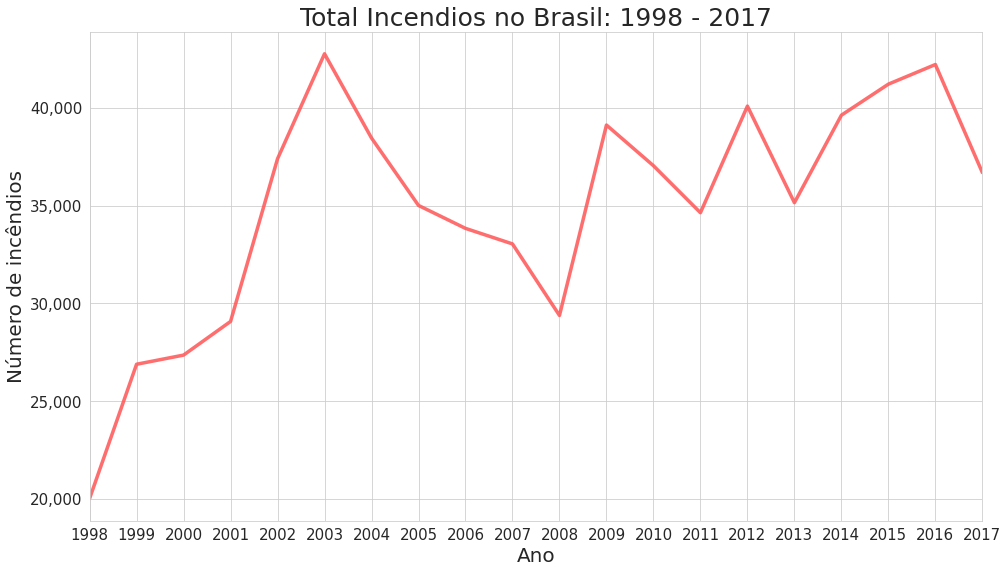

In [11]:
# Set up the defaults
sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(16,9))

# Make the plot
ax = sns.lineplot(x = 'year', y = 'number', data = aux, estimator = 'sum', color = '#FF5555', 
                  lw = 3.5, err_style = None , alpha = 0.85)
# Create a line
#import pylab as p
#p.arrow( 1998, 25000, 19, 15000, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
#       width = 0.15, alpha = 0.7, shape = "full")

# Make pretty
plt.title('Total Incendios no Brasil: 1998 - 2017', fontsize = 25)
plt.xlabel('Ano', fontsize = 20)
plt.ylabel('Número de incêndios', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

In [12]:
#creating a list of years we have 
years=list(forest.year.unique())
#creating an empty list, which will be populated later with amount of fires reported
sub_fires_per_year=[]
#using for loop to extract sum of fires reported for each year and append list above
for i in years:
    y=forest.loc[forest['year']==i].number.sum().round(0)
    sub_fires_per_year.append(y)
#creating a dictionary with results     
fire_year_dic={'year':years,'Total_Fires':sub_fires_per_year}
#creating a new sub dataframe for later plot 
time_plot_1_df=pd.DataFrame(fire_year_dic)
#checking the dataframe
time_plot_1_df.head(5)

,year,Total_Fires
0,1998,20014.0
1,1999,26883.0
2,2000,27351.0
3,2001,29072.0
4,2002,37391.0


In [13]:
#With idea to look deeper, it will require a bit more prep-work 

#putting all available states in the list
states=list(forest.state.unique())
#creating empty list for each state that will be later appended
acre_list=[]
alagoas_list=[] 
amapa_list=[] 
amazonas_list=[] 
bahia_list=[] 
ceara_list=[]
distrito_list=[] 
espirito_list=[] 
goias_list=[] 
maranhao_list=[] 
mato_list=[] 
minas_list=[]
para_list=[] 
paraiba_list=[] 
perna_list=[]
piau_list=[]
rio_list=[]
rondonia_list=[]
roraima_list=[]
santa_list=[]
sao_list=[]
sergipe_list=[]
tocantins_list=[]

In [14]:
#It get's interesting here

#breaking down fires reported for each state throughtout 20 years and appending empty lists
for x in states:
    st=x
    for i in years:
        ye=i
        if st=='Acre':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            acre_list.append(y)
        elif st=='Alagoas':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            alagoas_list.append(y)
        elif st=='Amazonas':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            amazonas_list.append(y)
        elif st=='Amapa':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            amapa_list.append(y)
        elif st=='Bahia':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            bahia_list.append(y)
        elif st=='Ceara':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            ceara_list.append(y)
        elif st=='Distrito Federal':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            distrito_list.append(y)
        elif st=='Espirito Santo':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            espirito_list.append(y)
        elif st=='Goias':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            goias_list.append(y)
        elif st=='Maranhao':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            maranhao_list.append(y)
        elif st=='Mato Grosso':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            mato_list.append(y)
        elif st=='Minas Gerais':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            minas_list.append(y)
        elif st=='Pará':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            para_list.append(y)
        elif st=='Paraiba':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            paraiba_list.append(y)
        elif st=='Pernambuco':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            perna_list.append(y)
        elif st=='Piau':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            piau_list.append(y)
        elif st=='Rio':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            rio_list.append(y)
        elif st=='Rondonia':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            rondonia_list.append(y)
        elif st=='Roraima':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            roraima_list.append(y)
        elif st=='Santa Catarina':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            santa_list.append(y)
        elif st=='Sao Paulo':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            sao_list.append(y)
        elif st=='Sergipe':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            sergipe_list.append(y)
        elif st=='Tocantins':
            y= forest.loc[( forest[ 'state']== st) & ( forest[ 'year']== ye)].number.sum().round(0)
            tocantins_list.append(y)

In [15]:
#with those lists populated, now creating a powerful dataframe
time_plot_2_df=pd.DataFrame(list(zip(years, acre_list, alagoas_list, amapa_list, amazonas_list,
                                     bahia_list, ceara_list, distrito_list, espirito_list,
                                     goias_list, maranhao_list, mato_list, minas_list, para_list,
                                     paraiba_list, perna_list, piau_list, rio_list, rondonia_list,
                                     roraima_list, santa_list, sao_list, sergipe_list, tocantins_list)),
                            columns =['Year', 'Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
                                      'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
                                      'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
                                      'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
                                      'Sao Paulo', 'Sergipe', 'Tocantins'])
#checking the dataframe
time_plot_2_df.head(10)

,Year,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,Maranhao,Mato Grosso,Minas Gerais,Pará,Paraiba,Pernambuco,Piau,Rio,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins
0,1998,730.0,86.0,278.0,946.0,1225.0,1612.0,103.0,218.0,750.0,366.0,2401.0,1233.0,716.0,816.0,767.0,1494.0,1149.0,916.0,21.0,59.0,3196.0,20.0,913.0
1,1999,333.0,172.0,101.0,1061.0,1198.0,1688.0,46.0,240.0,1910.0,1276.0,2979.0,997.0,2192.0,3437.0,463.0,2015.0,1030.0,209.0,220.0,364.0,4249.0,93.0,608.0
2,2000,434.0,123.0,253.0,853.0,1379.0,2211.0,48.0,175.0,2516.0,1244.0,3897.0,1493.0,794.0,2804.0,691.0,1112.0,650.0,868.0,362.0,306.0,4128.0,17.0,994.0
3,2001,828.0,86.0,1301.0,1297.0,2428.0,1848.0,64.0,130.0,2066.0,720.0,3088.0,2139.0,835.0,2073.0,1080.0,731.0,857.0,1004.0,1309.0,200.0,2926.0,24.0,2039.0
4,2002,1544.0,258.0,862.0,2852.0,2281.0,454.0,149.0,297.0,1619.0,530.0,3666.0,1950.0,1266.0,2249.0,1909.0,1504.0,2945.0,1452.0,2224.0,1715.0,3539.0,208.0,1919.0
5,2003,947.0,299.0,1652.0,1524.0,3076.0,796.0,96.0,708.0,2079.0,962.0,6940.0,1824.0,1073.0,2797.0,2431.0,1964.0,3438.0,1465.0,1789.0,1609.0,3306.0,403.0,1582.0
6,2004,1184.0,159.0,2261.0,2298.0,1644.0,383.0,279.0,174.0,1799.0,1197.0,4811.0,2141.0,1075.0,2761.0,1683.0,1778.0,3437.0,920.0,1457.0,2955.0,2864.0,190.0,1003.0
7,2005,984.0,217.0,1271.0,1657.0,2358.0,680.0,92.0,121.0,1709.0,1184.0,5387.0,1647.0,501.0,3427.0,1520.0,2211.0,2297.0,1678.0,860.0,1483.0,2123.0,200.0,1398.0
8,2006,1221.0,161.0,817.0,998.0,2509.0,1109.0,76.0,215.0,1294.0,924.0,4286.0,2464.0,1183.0,3308.0,1268.0,2358.0,2501.0,680.0,1245.0,1855.0,2209.0,147.0,1002.0
9,2007,1213.0,128.0,440.0,590.0,2210.0,1712.0,274.0,382.0,888.0,1911.0,3516.0,1214.0,1833.0,2665.0,1631.0,2714.0,2067.0,396.0,1863.0,1230.0,1877.0,124.0,2160.0


In [16]:
#preparing a figure that will be populated 
time_plot_2 = go.Figure()
#adding individual graphs to the figure
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Mato Grosso'],
                                 mode='lines+markers', name='Mato Grosso', line={'color': 'red'}))
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Paraiba'],
                                 mode='lines+markers', name='Paraiba', line={'color': 'yellow'}))
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Sao Paulo'],
                                 mode='lines+markers', name='Sao Paulo', line={'color': 'green'}))
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Rio'],
                                 mode='lines+markers', name='Rio', line={'color': 'blue'}))
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Bahia'],
                                 mode='lines+markers', name='Bahia', line={'color': 'pink'}))
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Piau'],
                                 mode='lines+markers', name='Piau', line={'color': 'brown'}))
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Goias'],
                                 mode='lines+markers', name='Goias', line={'color': 'grey'}))
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Minas Gerais'],
                                 mode='lines+markers', name='Minas Gerais', line={'color': 'purple'}))
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Tocantins'],
                                 mode='lines+markers', name='Tocantins', line={'color': 'orange'}))
time_plot_2.add_trace(go.Scatter(x=time_plot_2_df.Year, y=time_plot_2_df['Amazonas'],
                                 mode='lines+markers', name='Amazonas', line={'color': 'gold'}))
#making changes to layout
time_plot_2.update_layout(title='Estados mais afetados de 1998 a 2017',
                   xaxis_title='Year',
                   yaxis_title='Fires')
#outputing plot
time_plot_2.show()

In [17]:
aux_mes = forest.groupby(['data'])['number'].agg('sum')
indexs = []
for data in list(aux_mes.index):
    indexs.append(str(data))

In [18]:
fig = px.line(x=indexs, y=list(aux_mes[:]), title='Variação mensal de incêndios de 1998 a 2017')
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

In [19]:
#creating a dataframe for bar plot visualization
bar_plot_df=pd.DataFrame(time_plot_2_df.sum().nlargest(11))
#reseting index for first column
bar_plot_df=bar_plot_df.reset_index()
#renaming
bar_plot_df.rename(columns={'index':'State', 0:'Reported_Fires'}, inplace=True)
#removing Year observation
bar_plot_df.drop(bar_plot_df[bar_plot_df.State == 'Year'].index, inplace=True)
#checking dataframe
bar_plot_df

,State,Reported_Fires
0,Mato Grosso,96245.0
1,Paraiba,52437.0
2,Sao Paulo,51120.0
3,Rio,45160.0
4,Bahia,44747.0
6,Piau,37805.0
7,Goias,37694.0
8,Minas Gerais,37475.0
9,Tocantins,33707.0
10,Amazonas,30652.0


In [20]:
#making barplot
bar_plot=px.bar(bar_plot_df, x='State', y='Reported_Fires', color='Reported_Fires',
           labels={'Reported_Fires':'Número de incêndios', 'State':'Estados'}, color_continuous_scale='Reds')
#making layout changes
bar_plot.update_layout(xaxis_tickangle=-45, title_text='Estados mais afetados de 1998 a 2017')
#outputing plot
bar_plot.show()

In [21]:
#according to different sources, months from June - November are the hottes in Brazil

#isolating the hottest months by season
month_array_summer=['6','7','8']
month_array_fall=['9','10','11']
#leaving data only for hottest months
box_plot_df_summer=forest.loc[forest['month'].isin(month_array_summer)]
box_plot_df_fall=forest.loc[forest['month'].isin(month_array_fall)]
#visualizing reports
box_plot=go.Figure()

box_plot.add_trace(go.Box(y=box_plot_df_summer.number, x=box_plot_df_summer.month,
                          name='Verão', marker_color='#3D9970',
                          boxpoints='all', jitter=0.5, whiskerwidth=0.2,
                          marker_size=2,line_width=2))
box_plot.add_trace(go.Box(y=box_plot_df_fall.number, x=box_plot_df_fall.month,
                         name='Outono', marker_color='#FF851B',
                         boxpoints='all', jitter=0.5, whiskerwidth=0.2,
                          marker_size=2,line_width=2))

box_plot.update_layout(
        title_text = 'Distribuição de incêndios de 1998 a 2017 nos meses mais quentes')
box_plot.show()

In [22]:
#creating subdataframe for visualizing this states geographically
geo_plot_df=pd.DataFrame(time_plot_2_df.sum().nlargest(11))
#formatting new dataframe
geo_plot_df.rename(columns={0:'Volume'}, inplace=True)
geo_plot_df.reset_index(inplace=True)
geo_plot_df.rename(columns={'index':'Estado'}, inplace=True)
geo_plot_df.drop(geo_plot_df.index[5], inplace=True)
#cheking new sub dataframe 
geo_plot_df

,Estado,Volume
0,Mato Grosso,96245.0
1,Paraiba,52437.0
2,Sao Paulo,51120.0
3,Rio,45160.0
4,Bahia,44747.0
6,Piau,37805.0
7,Goias,37694.0
8,Minas Gerais,37475.0
9,Tocantins,33707.0
10,Amazonas,30652.0


In [23]:
#taking my time and adding all coordinates (latitude and longitude) for this top 10 states
lat=[-16.350000, -22.15847, -23.533773, -22.908333, -11.409874, -21.5089, -16.328547,
     -19.841644, -21.175, -3.416843]
long=[-56.666668, -43.29321, -46.625290, -43.196388, -41.280857, -43.3228, -48.953403,
     -43.986511, -43.01778, -65.856064]
#adding new coordinates as columns to subdataframe above
geo_plot_df['Lat']=lat
geo_plot_df['Long']=long
#checking changes in subdataframe for geo visualization
geo_plot_df

,Estado,Volume,Lat,Long
0,Mato Grosso,96245.0,-16.350000,-56.666668
1,Paraiba,52437.0,-22.158470,-43.293210
2,Sao Paulo,51120.0,-23.533773,-46.625290
3,Rio,45160.0,-22.908333,-43.196388
4,Bahia,44747.0,-11.409874,-41.280857
6,Piau,37805.0,-21.508900,-43.322800
7,Goias,37694.0,-16.328547,-48.953403
8,Minas Gerais,37475.0,-19.841644,-43.986511
9,Tocantins,33707.0,-21.175000,-43.017780
10,Amazonas,30652.0,-3.416843,-65.856064


In [24]:
#using scatter geo with above created subdataframe
fig = px.scatter_geo(data_frame=geo_plot_df, scope='south america',lat='Lat',lon='Long',
                     size='Volume', color='Estado', projection='hammer')
fig.update_layout(
        title_text = 'Estados mais afetados de 1998 a 2017')
fig.show()

In [25]:
aux_mes = pd.DataFrame(aux_mes).reset_index()

In [26]:
aux_mes

,data,number
0,1998-01-01,0.000
1,1998-02-01,0.000
2,1998-03-01,0.000
3,1998-04-01,0.000
4,1998-05-01,0.000
...,...,...
234,2017-07-01,5929.998
235,2017-08-01,4120.410
236,2017-09-01,2779.317
237,2017-10-01,3600.159


In [27]:
base_treinamento = aux_mes.iloc[:, 1:2]

In [28]:
base_treinamento.tail(15)

,number
224,3081.020
225,4350.885
226,4692.476
227,3740.877
228,2408.000
229,1400.000
230,2017.000
231,1559.000
232,2506.000
233,4148.361


In [29]:
X_train = base_treinamento.iloc[0:180, :]
X_val = base_treinamento.iloc[180:, :]

In [30]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(X_train)

In [31]:
previsores = []
num_real = []
for i in range(12, 179):
    previsores.append(base_treinamento_normalizada[i-12:i, 0])
    num_real.append(base_treinamento_normalizada[i, 0])
previsores, num_real = np.array(previsores), np.array(num_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [32]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))


regressor.add(Dense(units = 1, activation = 'relu'))


regressor.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
regressor.fit(previsores, num_real, epochs = 100, batch_size = 32)

Epoch 1/100
6/6 [==============================] - 0s 25ms/step - loss: 0.1465 - mean_squared_error: 0.1465
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 5/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 6/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 7/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 8/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 9/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0453 - mean_squared_error: 0.0453
Epoch 10/100
6/6 [==========

In [33]:
X_val.head(10)

,number
180,2045.000
181,1587.000
182,1969.000
183,1372.000
184,2165.000
185,2686.213
186,3180.134
187,5855.928
188,2979.634
189,3701.641


In [34]:
base_teste = X_val

entradas = base_treinamento[len(base_treinamento) - len(base_teste) - 12:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

In [35]:
entradas

array([[0.33945992],
       [0.19569026],
       [0.28045304],
       [0.2988501 ],
       [0.44152956],
       [0.57789283],
       [0.61487134],
       [0.66249249],
       [0.41850843],
       [0.3863941 ],
       [0.73972091],
       [0.50668352],
       [0.27868147],
       [0.21626772],
       [0.2683246 ],
       [0.18696869],
       [0.29503441],
       [0.36606248],
       [0.43337135],
       [0.79801399],
       [0.4060483 ],
       [0.50443948],
       [0.51734755],
       [0.51896158],
       [0.35881091],
       [0.21081674],
       [0.30307461],
       [0.3213354 ],
       [0.43457956],
       [0.45231801],
       [0.53200278],
       [0.37316321],
       [0.42668572],
       [0.75125942],
       [0.72874918],
       [0.5065636 ],
       [0.63163257],
       [0.31465795],
       [0.30007657],
       [0.35063443],
       [0.32487854],
       [0.44433028],
       [0.59475558],
       [0.59458292],
       [0.33995841],
       [0.61317077],
       [0.54980215],
       [0.557

In [36]:
X_teste = []
for i in range(12, 72):
    X_teste.append(entradas[i-12:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

In [37]:
print(previsoes.mean())
print(base_teste.mean())

3049.0974
number    3302.939763
dtype: float64


In [38]:
base_teste_plot = pd.DataFrame(base_teste).reset_index()
previsoes_plot = pd.DataFrame(previsoes).reset_index()
previsoes_plot = previsoes_plot.rename(columns={0: "number"})


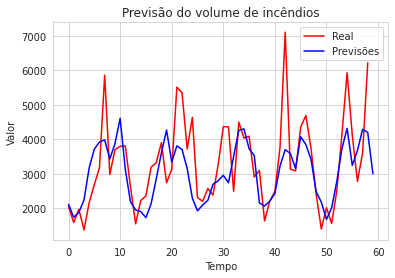

In [40]:
plt.plot(base_teste_plot['number'], color = 'red', label = 'Real')
plt.plot(previsoes_plot['number'], color = 'blue', label = 'Previsões')
plt.title('Previsão do volume de incêndios')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()